<a href="https://colab.research.google.com/github/Fin-N1049/DeepLearning/blob/main/MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Multidimensional Scaling (MDS) Implementation
# Author: Finson N
# ---------------------------------------------
# We'll implement both sklearn and manual versions

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import MDS


In [2]:
# Load dataset
iris = datasets.load_iris()
X = iris.data  # 4D features
y = iris.target

print("Original shape:", X.shape)


Original shape: (150, 4)


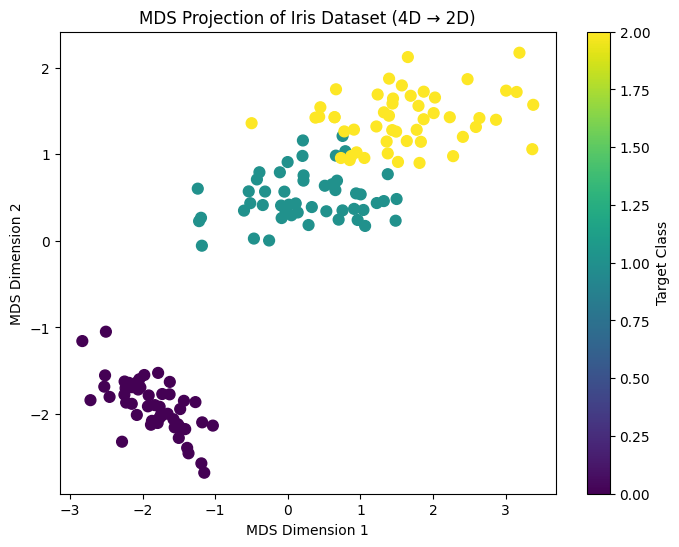

In [3]:
# Apply MDS
mds = MDS(n_components=2, dissimilarity="euclidean", random_state=42)
X_mds = mds.fit_transform(X)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_mds[:,0], X_mds[:,1], c=y, cmap='viridis', s=60)
plt.title("MDS Projection of Iris Dataset (4D → 2D)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.colorbar(label='Target Class')
plt.show()


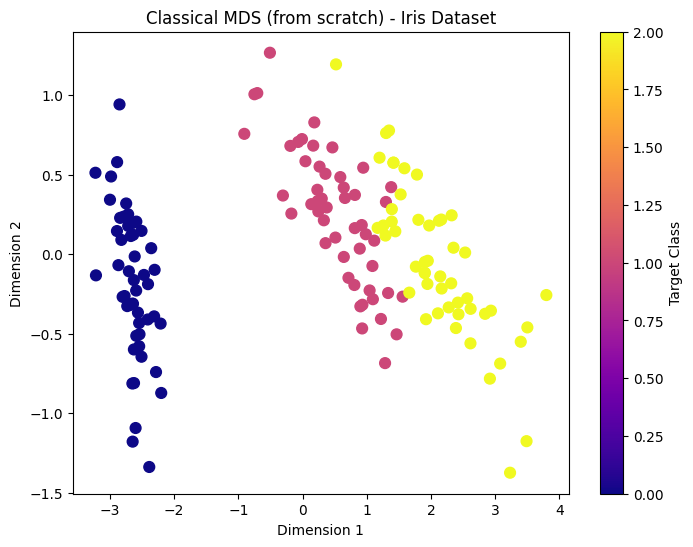

In [4]:
def classical_mds(D, n_components=2):
    """
    Classical Multidimensional Scaling (from scratch)
    D: NxN distance matrix
    n_components: reduced dimension
    """
    # Step 1: Centering matrix
    n = D.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n

    # Step 2: Apply double centering
    B = -0.5 * H @ (D ** 2) @ H

    # Step 3: Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(B)

    # Step 4: Sort by descending eigenvalues
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Step 5: Select top components
    L = np.diag(np.sqrt(eigvals[:n_components]))
    V = eigvecs[:, :n_components]
    X_proj = V @ L

    return X_proj

# Compute pairwise distances
from scipy.spatial import distance_matrix
D = distance_matrix(X, X)

# Apply classical MDS
X_mds_manual = classical_mds(D, 2)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_mds_manual[:,0], X_mds_manual[:,1], c=y, cmap='plasma', s=60)
plt.title("Classical MDS (from scratch) - Iris Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label='Target Class')
plt.show()
